### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize']=22,8
import re

#### 1. Import the necessary packages - 2.5 marks

In [3]:
user=pd.read_csv('user.csv')
data=pd.read_csv('Data_Movies.csv')
item=pd.read_csv('item.csv')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
# rename data sets.
df1=user
df2=data
df3=item


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
#visualize data frame 1 info.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [6]:
df1.shape

(943, 5)

In [9]:
df1.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [7]:
df1.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
df1.tail()

,user id,age,gender,occupation,zip code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [7]:
#visualize data frame 2 info.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [14]:
df2.shape


(100000, 4)

In [15]:
df2.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [8]:
df2.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df2.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [17]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [10]:
#visualize data frame 3 info.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [18]:
df3.shape

(1681, 22)

In [19]:
df3.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [11]:
df3.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df3.tail()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [23]:
df3.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [66]:
#hint: use sum on the axis = 1
df3[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum(1)

0       3
1       3
2       1
3       3
4       3
       ..
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [79]:
# Ran df3.drop('unknown',axis=1,inplace=True); then printed to confirm we jad dropped genre unknown
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   Action        1681 non-null   int64 
 4   Adventure     1681 non-null   int64 
 5   Animation     1681 non-null   int64 
 6   Childrens     1681 non-null   int64 
 7   Comedy        1681 non-null   int64 
 8   Crime         1681 non-null   int64 
 9   Documentary   1681 non-null   int64 
 10  Drama         1681 non-null   int64 
 11  Fantasy       1681 non-null   int64 
 12  Film-Noir     1681 non-null   int64 
 13  Horror        1681 non-null   int64 
 14  Musical       1681 non-null   int64 
 15  Mystery       1681 non-null   int64 
 16  Romance       1681 non-null   int64 
 17  Sci-Fi        1681 non-null   int64 
 18  Thriller      1681 non-null   int64 
 19  War   

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [21]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [22]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


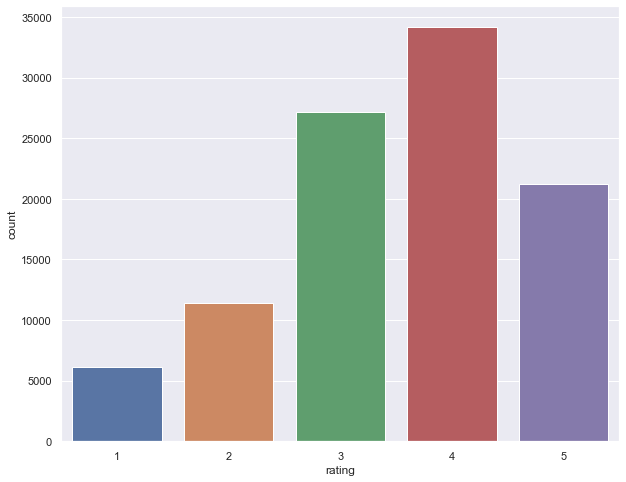

In [111]:
#your answers here
sns.countplot(df2['rating']);

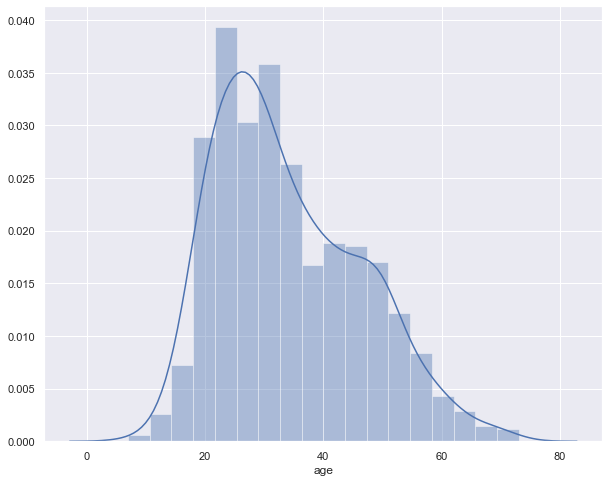

In [112]:
#age plot
sns.distplot(df1['age']);

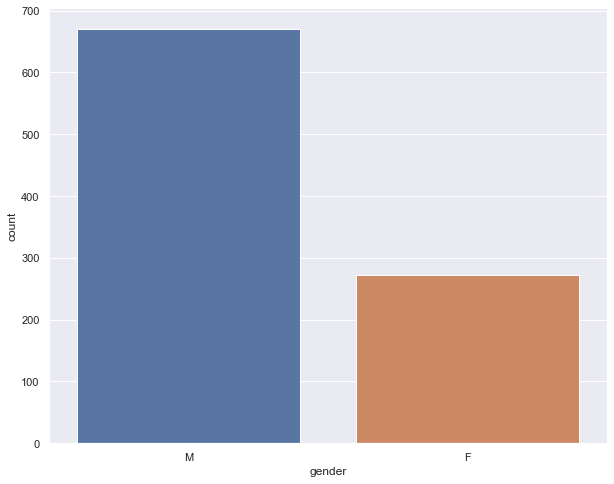

In [113]:
#Gender plot
sns.countplot(df1['gender']);


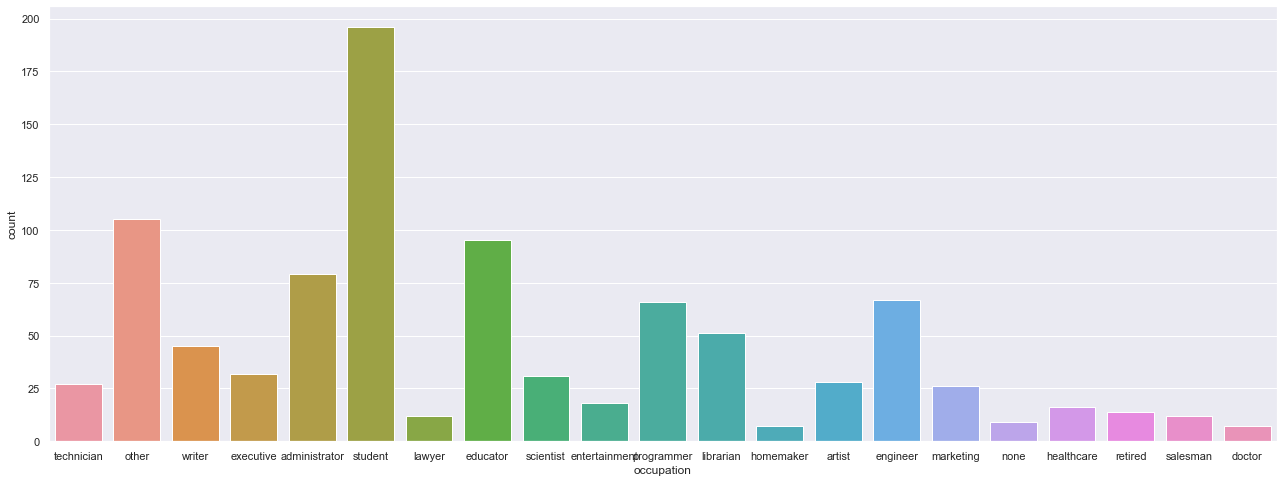

In [130]:
#occupation plot
sns.countplot(x='occupation',y=None,data=df1,);


In [300]:
Year=df3['release date'].str.extract('(\d\d\d\d)',expand=False)
Year.drop('year',axis=0,inplace=True)
Year

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release date, Length: 1681, dtype: object

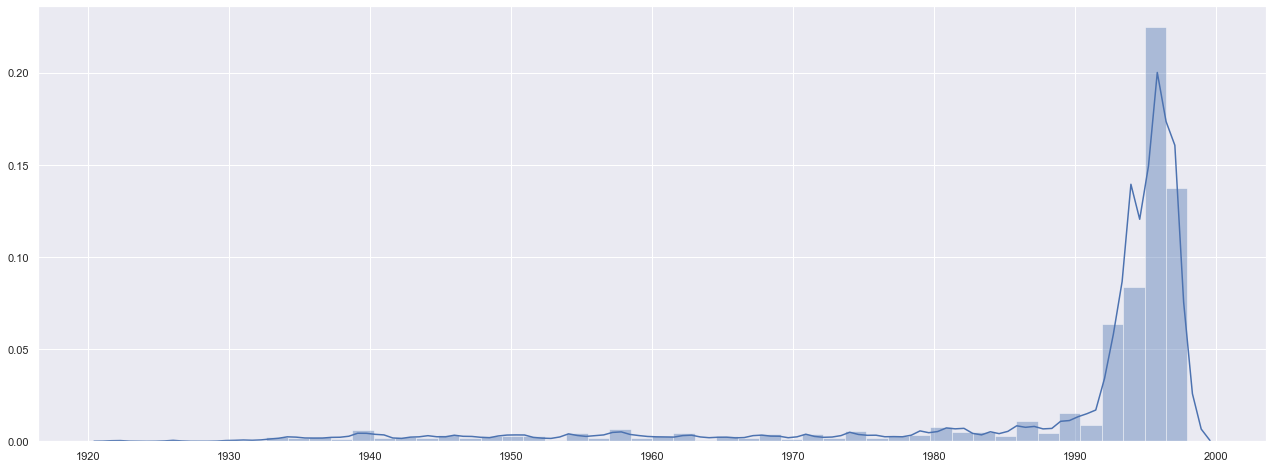

In [268]:
sns.distplot(Year);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [269]:
Genre=df3[['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
Genre

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [307]:
df4=pd.concat([Year,Genre],axis=1,ignore_index=False)
df4

,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [309]:
df5=df4.set_index('release date')
df5


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


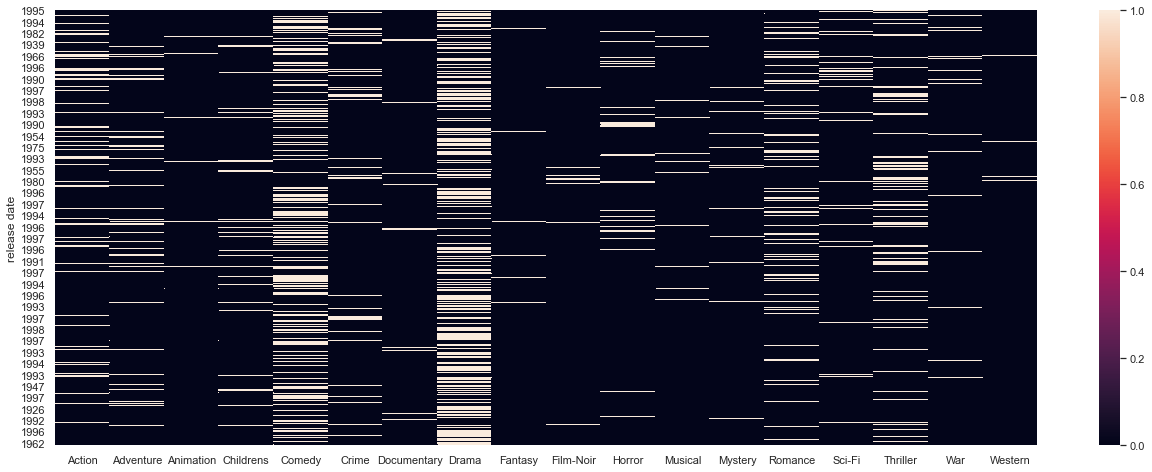

In [312]:
sns.heatmap(df5);

In [364]:
df6=df5.groupby('release date')
df6.count()




,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1922,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1926,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1930,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1931,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1932,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
1995,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219
1996,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [336]:
#your answer here
df7=pd.merge(df2,df3,on='movie id')
df7

,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,840,1674,4,891211682,Mamma Roma,01-Jan-1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99987,655,1640,3,888474646,"Eighth Day, The",01-Nov-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99988,655,1637,3,888984255,Girls Town,23-Aug-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99989,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
df7.groupby('movie title').count()


,user id,movie id,rating,timestamp,release date,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1-900,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
101 Dalmatians,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
12 Angry Men,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
187,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
Young Guns II,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
"Young Poisoner's Handbook, The",41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


In [366]:
df8=df7['movie title']
df8

0                                              Kolya 
1                                              Kolya 
2                                              Kolya 
3                                              Kolya 
4                                              Kolya 
                             ...                     
99986                                     Mamma Roma 
99987                                Eighth Day, The 
99988                                     Girls Town 
99989    Silence of the Palace, The (Saimt el Qusur) 
99990                                       Dadetown 
Name: movie title, Length: 99991, dtype: object

In [367]:
df9=df7['rating']
df9

0        3
1        3
2        5
3        3
4        5
        ..
99986    4
99987    3
99988    3
99989    3
99990    3
Name: rating, Length: 99991, dtype: int64

In [369]:
df10=pd.concat([df8,df9],axis=1)
df10

,movie title,rating
0,Kolya,3
1,Kolya,3
2,Kolya,5
3,Kolya,3
4,Kolya,5
...,...,...
99986,Mamma Roma,4
99987,"Eighth Day, The",3
99988,Girls Town,3
99989,"Silence of the Palace, The (Saimt el Qusur)",3


In [433]:
df11=df10.groupby('movie title').count()

In [447]:
df11.sort_values(['rating'],axis=0,ascending=False)



,rating
movie title,
Star Wars,583
Contact,509
Fargo,508
Return of the Jedi,507
Liar Liar,485
...,...
"Object of My Affection, The",1
Office Killer,1
"Other Voices, Other Rooms",1


In [450]:
# filter movies with more than 100 ratings
df11.query('rating>100').sort_values('rating',ascending=False)



,rating
movie title,
Star Wars,583
Contact,509
Fargo,508
Return of the Jedi,507
Liar Liar,485
...,...
Miracle on 34th Street,101
Pinocchio,101
Basic Instinct,101


In [464]:
#top 25 movies with rating over 4
df12=df10.groupby('movie title').mean()
df12.query('rating > 4').sort_values('rating', ascending=False).head(25)


,rating
movie title,
Marlene Dietrich: Shadow and Light (,5.000000
Aiqing wansui,5.000000
"Great Day in Harlem, A",5.000000
Prefontaine,5.000000
"Saint of Fort Washington, The",5.000000
Santa with Muscles,5.000000
Someone Else's America,5.000000
Star Kid,5.000000
They Made Me a Criminal,5.000000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [490]:
#based on information provided, 
#1) Man watch more drama than women=True
#2)Women watch more Sci-Fi than men=False
#3)Men watch more ROmance than women = True

#Note: As seen on univariable analysis, there were more Male than Female samples in the study, therefore there is bias on the answers above and data should normilize to truly infer the %

df12=pd.merge(df1,df2,on='user id')
df13=pd.merge(df12,df3,on='movie id')
df14=df13.groupby('gender').sum().T
df14

gender,F,M
user id,12225832,34019836
age,831719,2465018
movie id,11452645,31097965
rating,90894,262061
timestamp,22748573259055,65596431148640
Action,5442,20147
Adventure,3141,10612
Animation,995,2610
Childrens,2232,4950
Comedy,8068,21764
